analysis

/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/lidar/Mores.all.nc
2020-02-09T00:00:00.000000000


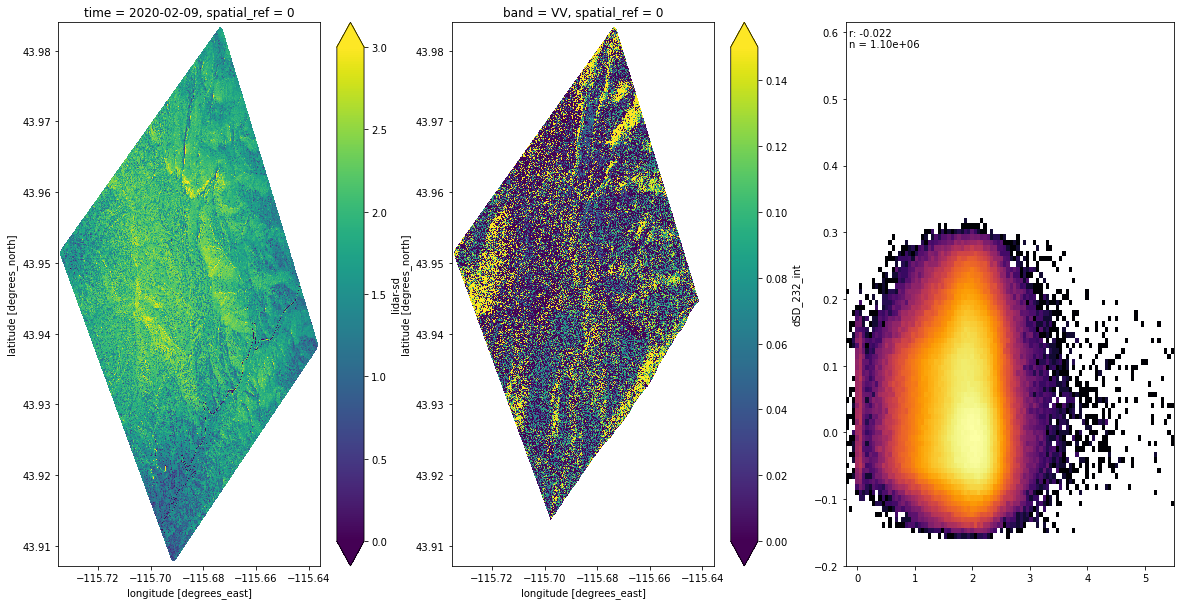

2021-03-15T00:00:00.000000000


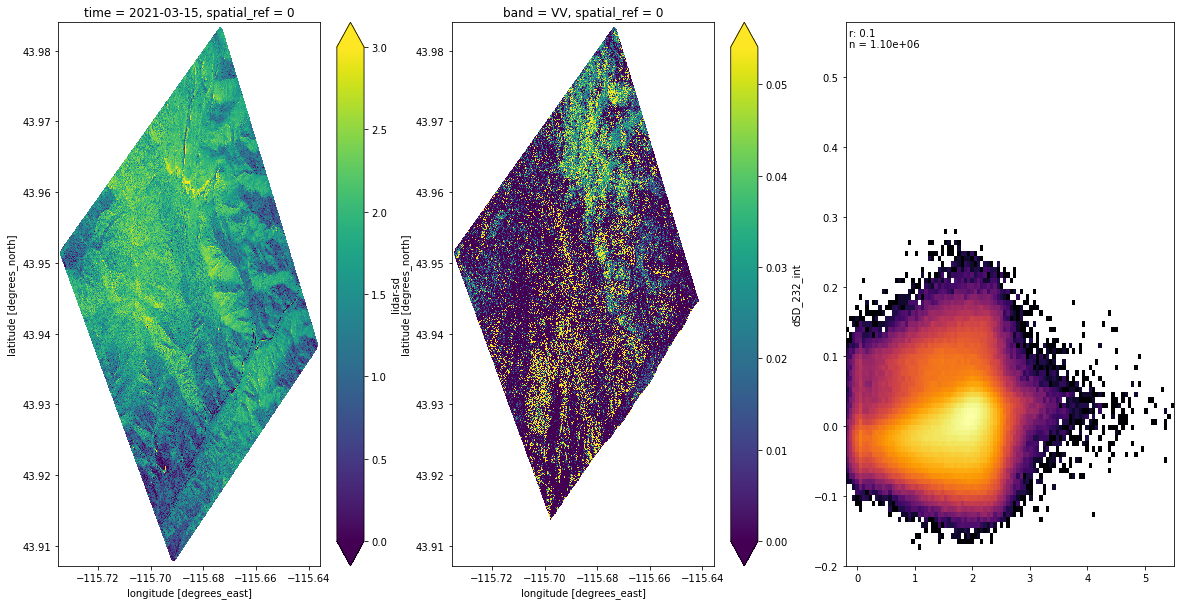

In [48]:
import xarray as xr
import numpy as np
import pandas as pd
import rioxarray as rxa
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl
import pandas as pd

# loop through each flight pair and calculate rmse, r2, plot
lidar = None

lidar_dir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/lidar')

for lidar_fp in lidar_dir.glob('*.all.nc'):
    print(lidar_fp)
    lidar = xr.open_dataset(lidar_fp)

    if isinstance(lidar.attrs['lidar_times'] , str):
        lidar.attrs['lidar_times'] = [lidar.attrs['lidar_times']]

    for t in lidar.attrs['lidar_times']:
        print(t)

        t = pd.to_datetime(t)
        ds = lidar.sel(time = slice(t - pd.Timedelta('180 days'), t))

        fig, axes = plt.subplots(1, 3, figsize = (20, 10))
        max_dSD = ds['dSD_232_int'].sel(band = 'VV').isel(time = ds['232_cor'].sel(band = 'VV').mean(dim = ['x', 'y']).argmax(dim = 'time'))
        max_dSD = max_dSD.where(~ds['lidar-sd'].sel(time = t).isnull())

        vmax = max_dSD.quantile(0.9)

        ds['lidar-sd'].sel(time = t).plot(vmin = 0, vmax = 3, ax = axes[0])
        max_dSD.plot(vmin = 0, vmax = vmax, ax = axes[1])

        ax = axes[2]

        xs = lidar['lidar-sd'].sel(time = t).values.ravel()
        ys = max_dSD.values.ravel()

        xs_tmp = xs[(~np.isnan(xs)) & (~np.isnan(ys)) & (ys != 0)]
        ys = ys[(~np.isnan(xs)) & (~np.isnan(ys)) & (ys != 0)]
        xs = xs_tmp

        range = [[-.2, 5.5], [-.2, np.max(ys) + 0.3]]
        ax.hist2d(xs_tmp, ys, bins = 100, norm=mpl.colors.LogNorm(), cmap=mpl.cm.inferno, range = range)

        from scipy.stats import pearsonr
        r, p = pearsonr(xs, ys)
        ax.text(.01, .99, f'r: {r:.2}\nn = {len(ys):.2e}', ha = 'left', va = 'top', transform = ax.transAxes)

        plt.show()

In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import rioxarray as rxa
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl
import pandas as pd

# loop through each flight pair and calculate rmse, r2, plot
lidar = None

lidar_dir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/lidar')

for lidar_fp in lidar_dir.glob('*.sd.nc'):
    print(lidar_fp)
    lidar = xr.open_dataset(lidar_fp)

    if isinstance(lidar.attrs['lidar_times'] , str):
        lidar.attrs['lidar_times'] = [lidar.attrs['lidar_times']]

    for t in lidar.attrs['lidar_times']:

        try:
            print(t)

            t = pd.to_datetime(t)
            ds = lidar.sel(time = slice(t - pd.Timedelta('180 days'), t))

            cum_sd232 = ds['dSD_232_int'].sum(dim = 'time').where(~ds['lidar-sd'].sel(time = t).isnull())
            cum_sd052 = ds['dSD_052_int'].sum(dim = 'time').where(~ds['lidar-sd'].sel(time = t).isnull())

            vmax = cum_sd232.sel(band = 'VV').quantile(0.9)

            if cum_sd052.sum() > 0:
                fig, axes = plt.subplots(1, 4, figsize = (20,10))
                cum_sd232.sel(band = 'VV').plot(vmin = 0, vmax = vmax, ax = axes[1], cmap = 'cividis')
                cum_sd052.sel(band = 'VV').plot(vmin = 0, vmax = vmax, ax = axes[2], cmap = 'cividis')
                ax = axes[3]
            else:
                fig, axes = plt.subplots(1, 3, figsize = (20,10))
                cum_sd232.sel(band = 'VV').plot(vmin = 0, vmax = vmax, ax = axes[1], cmap = 'cividis')
                ax = axes[2]

            ds['lidar-sd'].sel(time = t).plot(vmin = 0, vmax = 3, ax = axes[0])

            xs = lidar['lidar-sd'].sel(time = t).values.ravel()
            ys = cum_sd232.sel(band = 'VV').values.ravel()

            xs_tmp = xs[(~np.isnan(xs)) & (~np.isnan(ys)) & (ys != 0)]
            ys = ys[(~np.isnan(xs)) & (~np.isnan(ys)) & (ys != 0)]
            xs = xs_tmp

            range = [[-.2, 5.5], [-.2, np.max(ys) + 0.3]]
            ax.hist2d(xs_tmp, ys, bins = 100, norm=mpl.colors.LogNorm(), cmap=mpl.cm.inferno, range = range)

            from scipy.stats import pearsonr
            r, p = pearsonr(xs, ys)
            ax.text(.01, .99, f'r: {r:.2}\nn = {len(ys):.2e}', ha = 'left', va = 'top', transform = ax.transAxes)

            plt.savefig(f"/bsuhome/zacharykeskinen/uavsar-validation/figures/lidar/all/int_{lidar.attrs['site']}_{t.strftime('%Y-%m-%d')}.png")
        except ValueError:
            pass

/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/lidar/Mores.re.sd.nc
2020-02-09T00:00:00.000000000
2021-03-15T00:00:00.000000000
/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/lidar/Dry_Creek.re.sd.nc
2020-02-19T00:00:00.000000000
/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/lidar/Banner.re.sd.nc
2020-02-18T00:00:00.000000000
2021-03-15T00:00:00.000000000
